<a href="https://colab.research.google.com/github/vlgul/series-de-tiempo/blob/main/Capitulo_8_Suavizaci%C3%B3n_exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Capitulo 8:  Suavización exponencial** ###

### 8.5. Método multiplicativo de Holt-Winters ###

Ejemplo: Las ventas trimestrales (en miles de envases) de Tiger Sports Drinks de los últimos ocho años se proporcionan en la tabla 8.2, se pretende generar una gráfica de las ventas. En dicha gráfica se señala que hay un incremento lineal en las ventas del periodo de ocho años, y que el patrón estacional es creciente cuando aumenta el nivel de la serie temporal. Este patrón sugiera que el método multiplicativo de Holt-Winters podria aplicarse para pronosticar ventas futuras.

Variables:
Lt: Nivel de estimación
Bt: Tasa de crecimiento.
Snt: Factor estacional.
Pt: Pronóstico hecho en el último periodo.
Et: Error de pronóstico.
Et2: Error cuadrado del pronóstico.
Yest: Estimaciones de regresión.
St: Información sin tendencia.
Ert: Error estándar relativo.
Sn_3, Sn_2, Sn_1, S0: Prom. de factores estacionales con L=4 Factores
It: Vector donde se almacena los valores del índice en It con los factores estacionales promedio.

In [5]:
n<-33
Lt<-double(n)
Bt<-double(n)
Et<-double(n)
Et2<-double(n)
Pt<-double(n)
St<-double(n)
Snt<-double(n)
It<-double(n)
Yest<-double(n)
Ert<-double(n)

Agregar datos de ventas de bebidas del periodo 0 al 12.

In [24]:
t<-seq(0,32)
Yt<-c(0,72,116,136,96,77,123,146,101,81,131,158,109,87,140,167,120,94,147,177,128,102,162,191,134,106,170,200,142,115,177,218,149)
t
Yt

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32

[1]   0  72 116 136  96  77 123 146 101  81 131 158 109  87 140 167 120  94 147
[20] 177 128 102 162 191 134 106 170 200 142 115 177 218 149

Graficar datos de ventas de bicicletas de montaña del periodo 0 al 32.

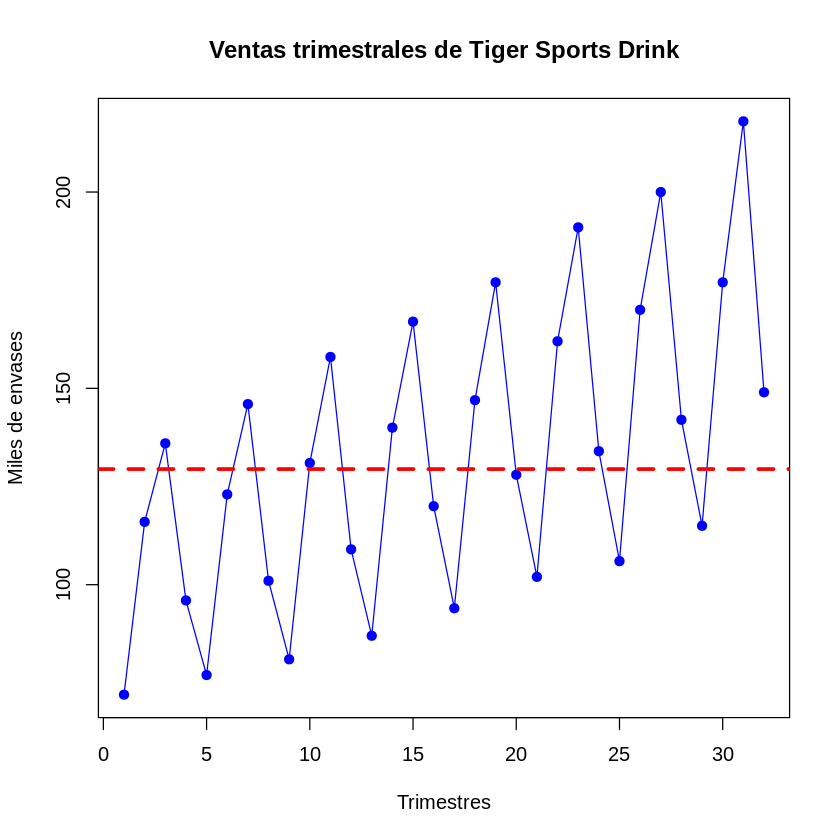

In [7]:
plot(t[(2:33)],Yt[(2:33)],main="Ventas trimestrales de Tiger Sports Drink",
     xlab="Trimestres",ylab="Miles de envases",
     type="o",pch = 19,
     col="blue")
abline(h = mean(Yt), col="red", lwd=3, lty=2)

Ajustar una recta de tendencia de mínimos cuadrados a la mitad de los datos totales n=32, n/2=16 y extraer valores para estimación inicial de los coeficientes para asignar a L0 y B0.

In [8]:
f <- lm(Yt[2:17] ~ t[2:17])
Reg<-summary(f)
L0<-Reg$coefficients[1]
B0<-Reg$coefficients[2]
f


Call:
lm(formula = Yt[2:17] ~ t[2:17])

Coefficients:
(Intercept)      t[2:17]  
     95.250        2.471  


Agregar valor inicial de coeficientes al nivel, la tasa de crecimiento y definir constantes de suavizacion alfa=0.2, gamma=0.1 y delta=0.1

In [9]:
Lt[1]<-L0
Bt[1]<-B0
alfa<-0.2
gamma<-0.1 
delta<-0.1

Calcular las estimaciones de regresión sin tendencia

In [10]:
for (i in 2:n){
  Yest[i]<-Lt[1]+Bt[1]*(i-1)
  St[i]<-Yt[i]/Yest[i]
}

Calcular factor estacional para L = 4, Sn_3, Sn_2, Sn_1, Sn0 y guardar valores en el vector It que almacene la información replicada para el índice promedio.

In [11]:
Sn_3<-((Yt[2]/Yest[2])+(Yt[6]/Yest[6])+(Yt[10]/Yest[10])+(Yt[14]/Yest[14]))/4
Sn_2<-((Yt[3]/Yest[3])+(Yt[7]/Yest[7])+(Yt[11]/Yest[11])+(Yt[15]/Yest[15]))/4
Sn_1<-((Yt[4]/Yest[4])+(Yt[8]/Yest[8])+(Yt[12]/Yest[12])+(Yt[16]/Yest[16]))/4
S0<-((Yt[5]/Yest[5])+(Yt[9]/Yest[9])+(Yt[13]/Yest[13])+(Yt[17]/Yest[17]))/4
SumProm<-Sn_3+Sn_2+Sn_1+S0
It[seq (1,n,by=4)]<-Sn_3
It[seq (2,n,by=4)]<-Sn_2
It[seq (3,n,by=4)]<-Sn_1
It[seq (4,n,by=4)]<-S0

Generar el cálculo de datos respecto a las variables Pt ,Lt, Bt, y Snt,para t>2, con los errores cuadráticos relativo. 

In [12]:
for (i in 2:n){
  Pt[i]<-(Lt[(i-1)]+Bt[(i-1)])*It[i-1]
  Et[i]<-Yt[i]-Pt[i]
  Lt[i]<-alfa*(Yt[i]/It[i-1])+((1-alfa)*(Lt[(i-1)]+Bt[(i-1)]))
  Bt[i]<-delta*(Lt[i]-Lt[i-1])+((1-delta)*Bt[(i-1)])
  Snt[i]<-gamma*(Yt[i]/Lt[i])+((1-gamma)*It[i-1])
  Et2[i]<-Et[i]^2
  Ert[i]<-((Yt[i]-Pt[i])/Pt[i])^2
}

Visualizar los valores resultantes en formato de tabla de Fig. 8.12

In [23]:
Bebidas<-data.frame(t,Yt,Yest,St,Lt,Bt,Snt,Pt,Et,Et2,Ert,It)
Bebidas

t,Yt,Yest,St,Lt,Bt,Snt,Pt,Et,Et2,Ert,It
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.00000,0.0000000,95.25000,2.470588,0.0000000,0.00000,0.00000000,0.000000000,0.000000e+00,0.7062246
1,72,97.72059,0.7367946,99.14186,2.661039,0.7071449,69.01268,2.98731671,8.924061120,1.873720e-03,1.1113886
2,116,100.19118,1.1577866,102.66677,2.776797,1.1122387,113.14258,2.85741596,8.164825980,6.378150e-04,1.2936942
3,136,102.66176,1.3247386,105.33663,2.762468,1.2935748,136.41173,-0.41172549,0.169517877,9.109868e-06,0.8885864
4,96,105.13235,0.9131347,108.07815,2.759661,0.8885708,96.05539,-0.05539131,0.003068198,3.325369e-07,0.7062246
5,77,107.60294,0.7155938,110.23055,2.678287,0.7058709,78.27639,-1.27639147,1.629175191,2.658926e-04,1.1113886
6,123,110.07353,1.1174349,112.15738,2.577592,1.1107117,125.48559,-2.48559214,6.178168296,3.923485e-04,1.2936942
7,146,112.54412,1.2972690,114.10334,2.492954,1.2930432,148.43196,-2.43196422,5.914449972,2.684476e-04,0.8885864
8,101,115.01471,0.8781486,115.61093,2.360915,0.8878980,103.60588,-2.60588180,6.790619945,6.326166e-04,0.7062246


Valor del error estandar SSE para calcular el error de pronostico St

In [14]:
SSRE<-sum(Ert)
Sr<-sqrt(SSRE/29)

Reproducir los valores resultantes en formato de tabla de Fig. 8.14(b) con los valores nuevos para alfa<-0.336, gamma<-0.046, delta1<-0.134.

In [15]:
alfa1<-0.336
gamma1<-0.046
delta1<-0.134

In [16]:
for (i in 2:n){
  Pt[i]<-(Lt[(i-1)]+Bt[(i-1)])*It[i-1]
  Et[i]<-Yt[i]-Pt[i]
  Lt[i]<-alfa1*(Yt[i]/It[i-1])+((1-alfa1)*(Lt[(i-1)]+Bt[(i-1)]))
  Bt[i]<-delta1*(Lt[i]-Lt[i-1])+((1-delta1)*Bt[(i-1)])
  Snt[i]<-gamma1*(Yt[i]/Lt[i])+((1-gamma1)*It[i-1])
  Et2[i]<-Et[i]^2
  Ert[i]<-((Yt[i]-Pt[i])/Pt[i])^2
}

Visualizar los valores resultantes en formato de tabla de Fig. 8.14(b)

In [22]:
Bebidas1<-data.frame(t,Yt,Yest,St,Lt,Bt,Snt,Pt,Et,Et2,Ert,It)
Bebidas1

t,Yt,Yest,St,Lt,Bt,Snt,Pt,Et,Et2,Ert,It
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.00000,0.0000000,95.25000,2.470588,0.0000000,0.00000,0.00000000,0.000000000,0.000000e+00,0.7062246
1,72,97.72059,0.7367946,99.14186,2.661039,0.7071449,69.01268,2.98731671,8.924061120,1.873720e-03,1.1113886
2,116,100.19118,1.1577866,102.66677,2.776797,1.1122387,113.14258,2.85741596,8.164825980,6.378150e-04,1.2936942
3,136,102.66176,1.3247386,105.33663,2.762468,1.2935748,136.41173,-0.41172549,0.169517877,9.109868e-06,0.8885864
4,96,105.13235,0.9131347,108.07815,2.759661,0.8885708,96.05539,-0.05539131,0.003068198,3.325369e-07,0.7062246
5,77,107.60294,0.7155938,110.23055,2.678287,0.7058709,78.27639,-1.27639147,1.629175191,2.658926e-04,1.1113886
6,123,110.07353,1.1174349,112.15738,2.577592,1.1107117,125.48559,-2.48559214,6.178168296,3.923485e-04,1.2936942
7,146,112.54412,1.2972690,114.10334,2.492954,1.2930432,148.43196,-2.43196422,5.914449972,2.684476e-04,0.8885864
8,101,115.01471,0.8781486,115.61093,2.360915,0.8878980,103.60588,-2.60588180,6.790619945,6.326166e-04,0.7062246


Generar intervalos de prediccion del 95% para $Y_{est}=33,34,35,36$, $Z=1.96$

Para $Y_{est}=33$ para un intervalo de predicción del 95%

In [18]:
Z<-qnorm(0.975, mean = 0, sd = 1)
Yest33<-(Lt[32]+Bt[32])*It[29]
Y33i<-Yest33-Z*Sr*sqrt((Lt[32]+Bt[32])^2)*It[29]
Y33s<-Yest33+Z*Sr*sqrt((Lt[32]+Bt[32])^2)*It[29]
cat("Valor Inferior =",Y33i,"\n")
cat("Valor Superior =",Y33s)

Valor Inferior = 113.9214 
Valor Superior = 123.3608

Para Yest=34 para un intervalo de predicción del 95%

In [19]:
Yest34<-(Lt[32]+2*Bt[32])*It[30]
C2<-(alfa1)^2*(1+delta1)*(Lt[32]+Bt[32])^2+(Lt[32]+2*Bt[32])^2
Y34i<-Yest34-Z*Sr*sqrt(C2)*It[30]
Y34s<-Yest34+Z*Sr*sqrt(C2)*It[30]
cat("Valor Inferior =",Y34i,"\n")
cat("Valor Superior =",Y34s)

Valor Inferior = 181.2856 
Valor Superior = 197.255

Para Yest=35 para un intervalo de predicción del 95%

In [20]:
Yest35<-(Lt[32]+3*Bt[32])*It[31]
C3<-(alfa1)^2*(1+delta1)*(Lt[32]+Bt[32])^2+(Lt[32]+3*Bt[32])^2
Y35i<-Yest34-Z*Sr*sqrt(C3)*It[31]
Y35s<-Yest34+Z*Sr*sqrt(C3)*It[31]
cat("Valor Inferior =",Y35i,"\n")
cat("Valor Superior =",Y35s)

Valor Inferior = 179.8638 
Valor Superior = 198.6768

Para Yest=36 para un intervalo de predicción del 95%

In [21]:
Yest36<-(Lt[32]+4*Bt[32])*It[32]
C4<-(alfa1)^2*(1+delta1)*(Lt[32]+Bt[32])^2+(Lt[32]+4*Bt[32])^2
Y36i<-Yest36-Z*Sr*sqrt(C4)*It[32]
Y36s<-Yest36+Z*Sr*sqrt(C4)*It[32]
cat("Valor Inferior =",Y36i,"\n")
cat("Valor Superior =",Y36s)

Valor Inferior = 148.8893 
Valor Superior = 161.9653